# Simulation of a Si homo pn-junction

The following code loads the needed modules.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from synumses.one_dimension.scharfetter_gummel_bernoulli import bernoulli, jacobian, update_b, first_jacobian, first_update_b, hole_current_density, electron_current_density

import synumses.one_dimension.parameters as parameters

from synumses.one_dimension.functions import calc_p_density, calc_n_density


import synumses.one_dimension.solver as solver

#parameters.n = 20
#parameters.init_geometry()
#parameters.init_parameters()
#parameters.init_default_doping()

# Simulation of the default device

By default the package uses the following parameters for silicon:<br>
* **parameters.n  = 400**, 400 cell points
* **parameters.lx = 400E-9**, total length of device $l_\mathrm{x} = 400\,\mathrm{nm}$
* **parameters.C[000:199]   = -1E24**, left part of device is p-doped $N_\mathrm{A} = 10^{24}\,\mathrm{m}^{-3}$
* **parameters.C[200:399] = +1E24**, right part of device is p-doped $N_\mathrm{D} = 10^{24}\,\mathrm{m}^{-3}$
* **parameters.Epsilon[0:399] = $\varepsilon_0 \cdot \varepsilon_\mathrm{r, Si}$**, materialparameter von silicon 
* **parameters.Chi[0:399] = $4.05\,\mathrm{eV}$**, electron affinity
* **parameters.Eg[0:399] = $1.12\,\mathrm{eV}$**, band gap energy
* **parameters.Cau[0:399] = $2.3\cdot 10^{-20} \mathrm{\dfrac{m^3}{s}}$** defines the recombination rate :
    $\dfrac{\mathrm{d}n}{\mathrm{d}t} = Cau \left(n \cdot p - n_\mathrm{i}^2 \right)$


## Plot some default parameters
* Band diagram
* Doping

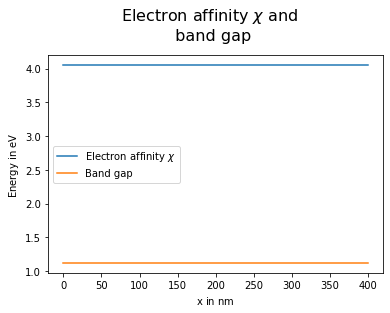

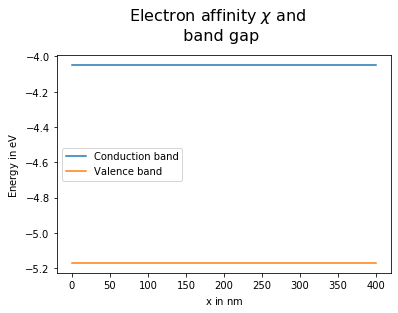

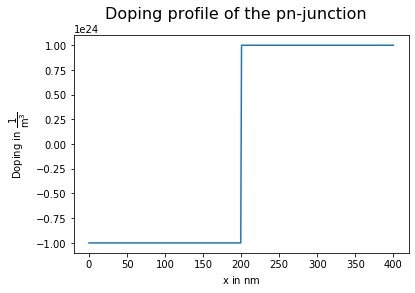

In [2]:
#
# Plot electron affinity  and \n band gap
#
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Electron affinity $\chi$ and \n band gap", y= 1.05, fontsize=16)

axis.plot(parameters.pos_x * 1E9, parameters.Chi, label='Electron affinity $\chi$')
axis.plot(parameters.pos_x * 1E9, parameters.Eg, label='Band gap')


plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"Energy in $\mathrm{eV}$")


axis.legend(loc = 6)
plt.show()

#
# Plot band diagram
#
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Electron affinity $\chi$ and \n band gap", y= 1.05, fontsize=16)

axis.plot(parameters.pos_x * 1E9, -parameters.Chi, label='Conduction band')
axis.plot(parameters.pos_x * 1E9, -parameters.Eg - parameters.Chi, label='Valence band')


plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"Energy in $\mathrm{eV}$")


axis.legend(loc = 6)
plt.show()

#
# Plot doping profile of the pn-junction
#
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Doping profile of the pn-junction", fontsize=16)

axis.plot(parameters.pos_x * 1E9, parameters.C, label='Doping')


plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"Doping in $\mathrm{\dfrac{1}{m^3}}$")
plt.show()


## Calculate the potential according the doping
The following function calculates the potential according the doping level.
This is needed the have a first guess of the potential.

In [9]:
solver.solve_from_doping()

Now, we plot the potential according the doping level. It's not smooth.

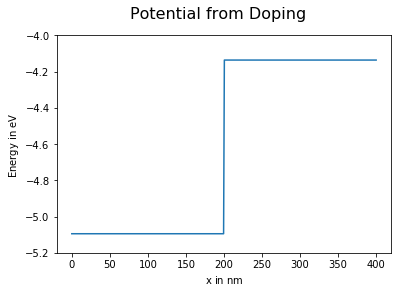

In [10]:
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Potential from Doping", fontsize=16)

plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"Energy in $\mathrm{eV}$")

axis.plot(parameters.pos_x * 1E9, parameters.u[0::3])
plt.ylim(-5.2, -4.0)
plt.savefig("Potential_from_Doing.png")
plt.show()

## Calculate the potential
Now, let's calculate the potential considering diffusion but no biasing.<br>
One simulation using **solver.solve_no_bias()** must be performed befor simulatoins with biasing.

In [6]:
solver.solve_no_bias()

/home/pabele/anaconda3/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


True

## Plot the potential

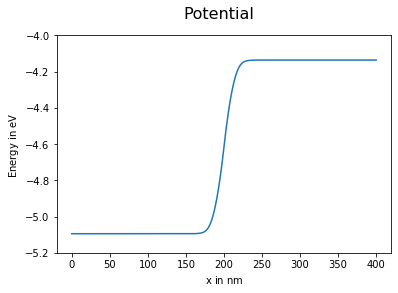

In [7]:
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Potential", fontsize=16)

plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"Energy in $\mathrm{eV}$")

axis.plot(parameters.pos_x * 1E9, parameters.u[0::3])
plt.ylim(-5.2, -4.0)
plt.savefig("Potential_00.png")

plt.show()

## Calculate the potential and quasi Fermi levels without biasing

In [10]:
solver.solve_bias(0,0)

True

## Plot the results
* potential,
* electron and hole density,
* electron and hole current density, and

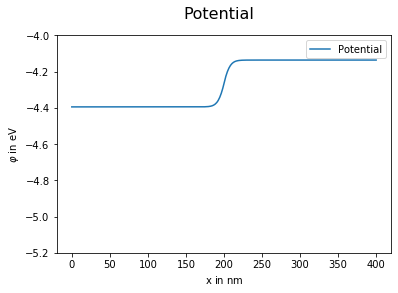

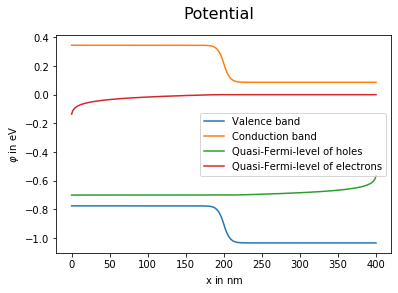

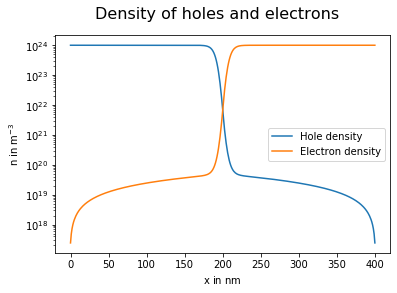

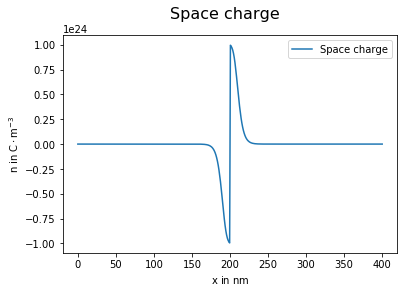

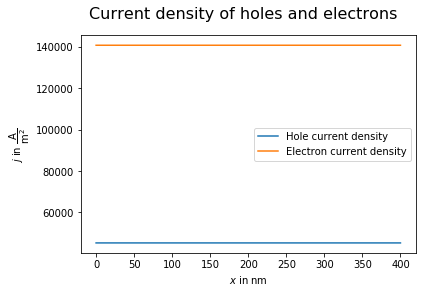

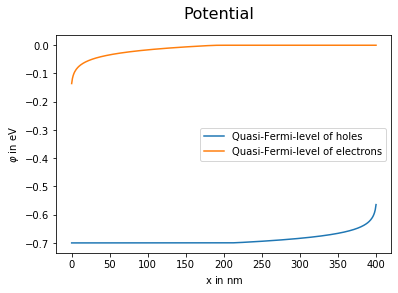

In [16]:
#
# Plot potential
#
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Potential", fontsize=16)

plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"$\varphi$ in $\mathrm{eV}$")

axis.plot(parameters.pos_x * 1E9, parameters.u[0::3], label='Potential')
axis.legend()
plt.ylim(-5.2, -4.0)
plt.savefig("Potential_bias.png")
plt.show()

#
# Plot band diagram
#
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Potential", fontsize=16)

plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"$\varphi$ in $\mathrm{eV}$")

axis.plot(parameters.pos_x * 1E9, -parameters.u[0::3] - parameters.Chi -  parameters.Eg, label='Valence band')
axis.plot(parameters.pos_x * 1E9, -parameters.u[0::3] - parameters.Chi                 , label='Conduction band')
axis.plot(parameters.pos_x * 1E9, -parameters.u[1::3]                                  , label='Quasi-Fermi-level of holes')
axis.plot(parameters.pos_x * 1E9, -parameters.u[2::3]                                  , label='Quasi-Fermi-level of electrons')

axis.legend()
plt.show()


#
# Plot electron and hole density
#
p = calc_p_density()
n = calc_n_density()

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Density of holes and electrons", fontsize=16)

plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"n in $\mathrm{m^{-3}}$")

axis.semilogy(parameters.pos_x * 1E9, p, label='Hole density')
axis.semilogy(parameters.pos_x * 1E9, n, label='Electron density')
axis.legend()
plt.show()

#
# Plot space charge
#
p = calc_p_density()
n = calc_n_density()

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Space charge", fontsize=16)

plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"n in $\mathrm{C \cdot m^{-3}}$")

axis.plot(parameters.pos_x * 1E9, p-n+parameters.C, label='Space charge')

axis.legend()
plt.show()

#
# Plot electron and hole current density 
#
j_p =     hole_current_density()
j_n = electron_current_density()

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Current density of holes and electrons", fontsize=16)

plt.xlabel(r"$x$ in $\mathrm{nm}$")
plt.ylabel(r"$j$ in $\mathrm{\dfrac{A}{m^{2}}}$")

axis.plot(parameters.pos_x * 1E9, j_p, label='Hole current density')
axis.plot(parameters.pos_x * 1E9, j_n, label='Electron current density')
axis.legend()
plt.show()


#
# Plot band diagram
#
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Potential", fontsize=16)

plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"$\varphi$ in $\mathrm{eV}$")

axis.plot(parameters.pos_x * 1E9, -parameters.u[1::3]                                  , label='Quasi-Fermi-level of holes')
axis.plot(parameters.pos_x * 1E9, -parameters.u[2::3]                                  , label='Quasi-Fermi-level of electrons')

axis.legend()
plt.show()

## Simulating a voltage sweep
Now let's simulate a voltage sweep to get the diode characteristics. <br>
The bias points are printed and stored in the arrays **voltage** and **current_density**.

In [12]:
u_start = 0.0
u_stop  = 0.7
u_step  = 0.025

voltage = []
current_density = []

bias_points = np.linspace(u_start, u_stop, int((u_stop-u_start)/(u_step))+2)
print(bias_points)
for bias_point in bias_points:

    solver.solve_bias(bias_point,0)   
    
    j = np.mean(hole_current_density() + electron_current_density())
    voltage.append(bias_point)
    current_density.append(j)
    print(bias_point, ",", j)
  

[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7  ]
0.0 , -0.00508991695585532
0.024999999999999998 , 0.002465605791864103
0.049999999999999996 , -0.001940359842235052
0.075 , -0.0011324314372503227
0.09999999999999999 , 0.001570607708798044
0.12499999999999999 , -0.0032066813179805176
0.15 , 0.00419478724689545
0.175 , -0.0009038669348409563
0.19999999999999998 , 0.002551256364577879
0.22499999999999998 , 0.004539377815436909
0.24999999999999997 , 0.007837526359810965
0.27499999999999997 , 0.012889883026914883
0.3 , 0.03652867541541382
0.32499999999999996 , 0.09672499189638502
0.35 , 0.25932169170366814
0.37499999999999994 , 0.6786437541559018
0.39999999999999997 , 1.7777964088950509
0.425 , 4.659259204956069
0.44999999999999996 , 12.20497193441588
0.475 , 31.98711958344651
0.49999999999999994 , 83.83626547601195
0.5249999999999999 , 219.71519857641397
0.549999

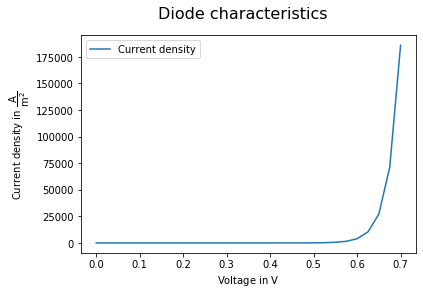

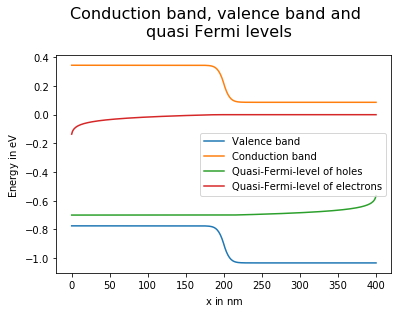

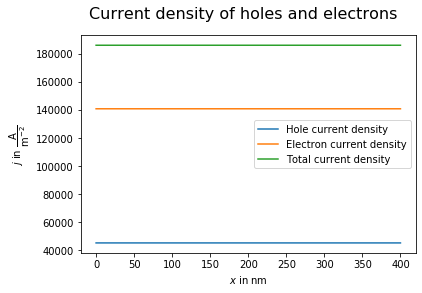

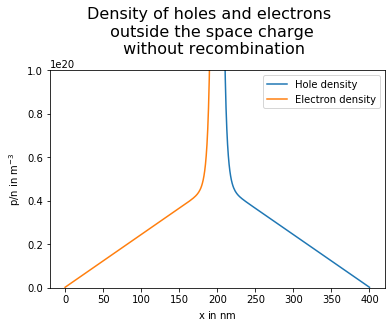

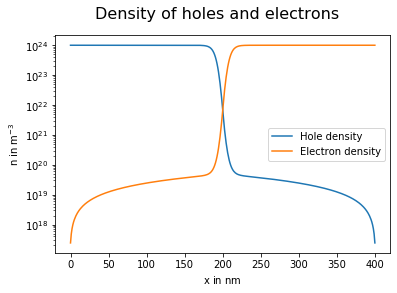

In [13]:
#
# Diode charactersistics
#
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Diode characteristics", fontsize=16)

axis.plot(voltage, current_density, label='Current density')

axis.set_xlabel(r"Voltage in $\mathrm{V}$")
axis.set_ylabel(r"Current density in $\mathrm{\dfrac{A}{m^2}}$")

axis.legend()
#plt.ylim(-1E-6,1E-6)
plt.show()

#
# Plot potential and quasi-Fermi-levels
#
fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Conduction band, valence band and \nquasi Fermi levels", y= 1.05, fontsize=16)

plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"Energy in $\mathrm{eV}$")

axis.plot(parameters.pos_x * 1E9, -parameters.u[0::3] - parameters.Chi -  parameters.Eg, label='Valence band')
axis.plot(parameters.pos_x * 1E9, -parameters.u[0::3] - parameters.Chi                 , label='Conduction band')
axis.plot(parameters.pos_x * 1E9, -parameters.u[1::3]                                  , label='Quasi-Fermi-level of holes')
axis.plot(parameters.pos_x * 1E9, -parameters.u[2::3]                                  , label='Quasi-Fermi-level of electrons')

plt.legend()
plt.show()

#
# Plot electron and hole current density 
#
j_p =     hole_current_density()
j_n = electron_current_density()

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Current density of holes and electrons", fontsize=16)

plt.xlabel(r"$x$ in $\mathrm{nm}$")
plt.ylabel(r"$j$ in $\mathrm{\dfrac{A}{m^{-2}}}$")

axis.plot(parameters.pos_x * 1E9, j_p, label='Hole current density')
axis.plot(parameters.pos_x * 1E9, j_n, label='Electron current density')
axis.plot(parameters.pos_x * 1E9, j_n+j_p, label='Total current density')

axis.legend()
plt.show()


# Electron and hole density outside the space cahreg

p = calc_p_density()
n = calc_n_density()

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Density of holes and electrons \n outside the space charge \n without recombination",  y=1.10, fontsize=16)

plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"p/n in $\mathrm{m^{-3}}$")

#axis.semilogy(p, label='Hole density')
axis.plot(parameters.pos_x * 1E9, p, label='Hole density')
#axis.semilogy(n, label='Electron density')
axis.plot(parameters.pos_x * 1E9, n, label='Electron density')

axis.legend()
plt.ylim(0, 1E20)
plt.show()

#
# Plot electron and hole density
#
p = calc_p_density()
n = calc_n_density()

fig, axis = plt.subplots(1,1, sharey=True)
fig.suptitle("Density of holes and electrons", fontsize=16)

plt.xlabel(r"x in $\mathrm{nm}$")
plt.ylabel(r"n in $\mathrm{m^{-3}}$")

axis.semilogy(parameters.pos_x * 1E9, p, label='Hole density')
axis.semilogy(parameters.pos_x * 1E9, n, label='Electron density')
axis.legend()
plt.show()